In [3]:
# Dependencie
import pandas as pd
import matplotlib.pyplot as plt

# Dependencies
import requests
import json

import gmaps
import numpy as np
import time

# Google API Key
from config import gkey

In [4]:
# Load in file
#testing_file = "resources/homeless_testing.csv"

testing_file = "resources/Homeless_311.csv"


In [5]:
# Read and display the CSV with Pandas
testing_pd = pd.read_csv(testing_file)
testing_pd.head(30)

/Users/jeqian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,17,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)"
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)"
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)"
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)"
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)"
5,27064784,01/05/2014 02:11:48 PM,01/05/2014 03:27:24 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,11224.0,2858 WEST 17 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577630,-73.984974,"(40.577630086322486, -73.98497424909723)"
6,27065889,01/05/2014 03:21:32 PM,01/05/2014 03:22:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,No Status Call,NaN,10461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852462,-73.828120,"(40.85246193342767, -73.82812002140368)"
7,35751611,03/20/2017 12:02:55 PM,03/20/2017 12:09:13 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Store/Commercial,11373.0,90-15 QUEENS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733847,-73.871578,"(40.73384724725437, -73.87157752015248)"
8,35751612,03/20/2017 02:42:33 PM,03/20/2017 04:31:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10019.0,650 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759788,-73.976544,"(40.7597884708963, -73.9765442390358)"
9,27068283,01/06/2014 05:49:00 AM,01/06/2014 06:04:06 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10010.0,110 EAST 25 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.741197,-73.984797,"(40.7411969358918, -73.98479662273373)"


In [6]:
# Create a group based on the values in the 'maker' column
year_group = testing_pd.groupby('Created Date')

# Count how many times each maker appears in our group
count_year = year_group['Unique Key'].count()

count_year

Created Date
01/01/2010 03:33:45 PM    1
01/01/2010 11:18:34 PM    1
01/01/2013 02:19:08 PM    1
01/01/2013 06:32:31 PM    1
01/01/2013 08:34:19 PM    1
                         ..
12/31/2018 12:26:04 AM    1
12/31/2018 12:34:41 PM    1
12/31/2018 12:37:45 PM    1
12/31/2018 12:38:49 PM    1
12/31/2018 12:46:43 PM    1
Name: Unique Key, Length: 154591, dtype: int64

In [7]:
pd.to_datetime(testing_pd['Created Date']).apply(lambda datetime:datetime.year)

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
154775    2014
154776    2014
154777    2014
154778    2014
154779    2014
Name: Created Date, Length: 154780, dtype: int64

In [8]:
testing_pd['year'] = pd.to_datetime(testing_pd['Created Date']).apply(lambda datetime:datetime.year)
testing_pd.head(30)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014
5,27064784,01/05/2014 02:11:48 PM,01/05/2014 03:27:24 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,11224.0,2858 WEST 17 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.577630,-73.984974,"(40.577630086322486, -73.98497424909723)",2014
6,27065889,01/05/2014 03:21:32 PM,01/05/2014 03:22:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,No Status Call,NaN,10461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852462,-73.828120,"(40.85246193342767, -73.82812002140368)",2014
7,35751611,03/20/2017 12:02:55 PM,03/20/2017 12:09:13 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Store/Commercial,11373.0,90-15 QUEENS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733847,-73.871578,"(40.73384724725437, -73.87157752015248)",2017
8,35751612,03/20/2017 02:42:33 PM,03/20/2017 04:31:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10019.0,650 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.759788,-73.976544,"(40.7597884708963, -73.9765442390358)",2017
9,27068283,01/06/2014 05:49:00 AM,01/06/2014 06:04:06 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10010.0,110 EAST 25 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.741197,-73.984797,"(40.7411969358918, -73.98479662273373)",2014


In [9]:
testing_pd['month'] = pd.to_datetime(testing_pd['Created Date']).apply(lambda datetime:datetime.month)
testing_pd.head(30)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,month
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014,1
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014,1
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014,1
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014,1
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014,1
5,27064784,01/05/2014 02:11:48 PM,01/05/2014 03:27:24 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,11224.0,2858 WEST 17 STREET,...,NaN,NaN,NaN,NaN,NaN,40.577630,-73.984974,"(40.577630086322486, -73.98497424909723)",2014,1
6,27065889,01/05/2014 03:21:32 PM,01/05/2014 03:22:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,No Status Call,NaN,10461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.852462,-73.828120,"(40.85246193342767, -73.82812002140368)",2014,1
7,35751611,03/20/2017 12:02:55 PM,03/20/2017 12:09:13 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Store/Commercial,11373.0,90-15 QUEENS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.733847,-73.871578,"(40.73384724725437, -73.87157752015248)",2017,3
8,35751612,03/20/2017 02:42:33 PM,03/20/2017 04:31:26 PM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10019.0,650 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.759788,-73.976544,"(40.7597884708963, -73.9765442390358)",2017,3
9,27068283,01/06/2014 05:49:00 AM,01/06/2014 06:04:06 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10010.0,110 EAST 25 STREET,...,NaN,NaN,NaN,NaN,NaN,40.741197,-73.984797,"(40.7411969358918, -73.98479662273373)",2014,1


In [10]:
new_data_frame = testing_pd[['Unique Key','Incident Zip','year','month','Latitude','Longitude']]
new_data_frame.head(30)

,Unique Key,Incident Zip,year,month,Latitude,Longitude
0,27059714,10011.0,2014,1,40.736853,-73.999726
1,27059781,10011.0,2014,1,40.737619,-74.000350
2,27062187,10065.0,2014,1,40.767683,-73.967563
3,27063414,10029.0,2014,1,40.793651,-73.939684
4,27064630,10026.0,2014,1,40.802633,-73.955796
5,27064784,11224.0,2014,1,40.577630,-73.984974
6,27065889,10461.0,2014,1,40.852462,-73.828120
7,35751611,11373.0,2017,3,40.733847,-73.871578
8,35751612,10019.0,2017,3,40.759788,-73.976544
9,27068283,10010.0,2014,1,40.741197,-73.984797


In [11]:
# Create a group based on the values in the 'maker' column
year_group = new_data_frame.groupby('year')

# Count how many times each maker appears in our group
count_year = year_group['Unique Key'].count()

count_year

year
2010     1787
2011     1839
2012     2186
2013     2932
2014     4912
2015    11384
2016    50783
2017    28324
2018    24435
2019    26198
Name: Unique Key, dtype: int64

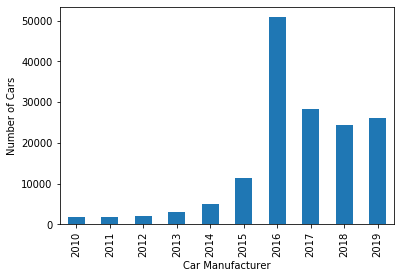

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a bar chart based off of the group series from before
count_chart = count_year.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()

In [13]:
testing_pd['month'] = pd.to_datetime(testing_pd['Created Date']).apply(lambda datetime:datetime.month)
testing_pd.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,year,month
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014,1
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014,1
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014,1
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014,1
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014,1


In [14]:
# Create a group based on the values in the 'maker' column
month_group = new_data_frame.groupby('month')

# Count how many times each maker appears in our group
count_month = month_group['Unique Key'].count()

count_month

month
1      7588
2      5560
3      8604
4     12212
5     13920
6     15442
7     17530
8     19585
9     18604
10    16225
11    11656
12     7854
Name: Unique Key, dtype: int64

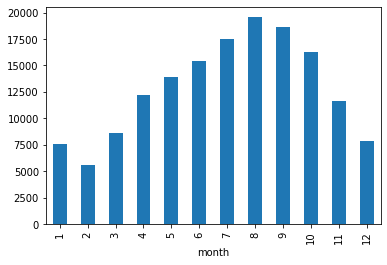

<Figure size 432x288 with 0 Axes>

In [40]:
# Create a bar chart based off of the group series from before
count_month_chart = count_month.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()

In [19]:
# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Store 'Lat' and 'Lng' into  locations 
locations = testing_pd[["Latitude", "Longitude"]]

locations = locations.dropna()

type(locations)

locations


,Latitude,Longitude
0,40.736853,-73.999726
1,40.737619,-74.000350
2,40.767683,-73.967563
3,40.793651,-73.939684
4,40.802633,-73.955796
...,...,...
154775,40.848186,-73.930848
154776,40.600040,-73.951541
154777,40.685232,-73.853293
154778,40.754864,-73.995820


In [21]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = True
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))